### Cloneing Real-ESRGAN Repository

In [2]:
### All instruction according to Real-ESRGAN paper original code repo

# Cloning of Real-ESRGAN Repo
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

# Setting up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

# Downloading the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 682, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 682 (delta 4), reused 11 (delta 1), pack-reused 665
Receiving objects: 100% (682/682), 5.03 MiB | 7.94 MiB/s, done.
Resolving deltas: 100% (359/359), done.
/kaggle/working/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 675.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194483 sha256=b9f3096d484f20de361e1c35542c0520ef198639acb70e584b5d7dbe5a43c4ff
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
  Attempting uninstall: protobuf
    Found existing

### Imports

In [3]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

### Preparing the Images

In [4]:
test_dir = "/kaggle/input/mirflickr25k/mirflickr25k/mirflickr/"
output_dir = '/TestImages/'
os.mkdir('/TestImages')
os.mkdir('/TestImages/hr_images')
os.mkdir('/TestImages/lr_images')

def is_image_file(filename):
    return any(filename.endswith(extension) for extension in ['.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'])

for img in os.listdir(test_dir)[0:10]:
    if is_image_file(img):
        img_array = cv2.imread(test_dir + img)
        img_array = cv2.resize(img_array, (128,128))
        lr_img_array = cv2.resize(img_array,(32,32))
        cv2.imwrite(output_dir+ "hr_images/" + img, img_array)
        cv2.imwrite(output_dir+ "lr_images/"+ img, lr_img_array)

### Model Prediction

In [14]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i '/TestImages/lr_images' -o '/results' --outscale 8 --face_enhance

Testing 0 im13058
Testing 1 im13543
Testing 2 im14937
Testing 3 im15415
Testing 4 im15781
Testing 5 im1961
Testing 6 im21779
Testing 7 im23724
Testing 8 im6770
Testing 9 im8761


### Image Visualization

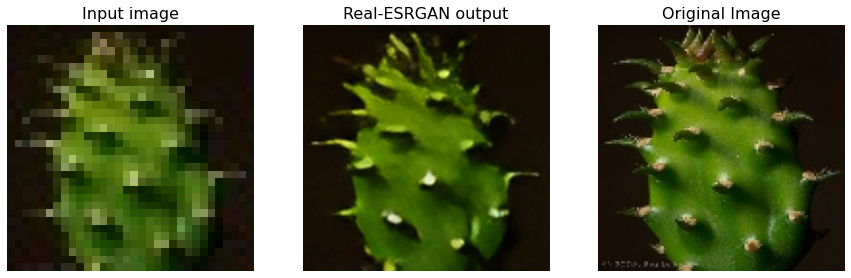

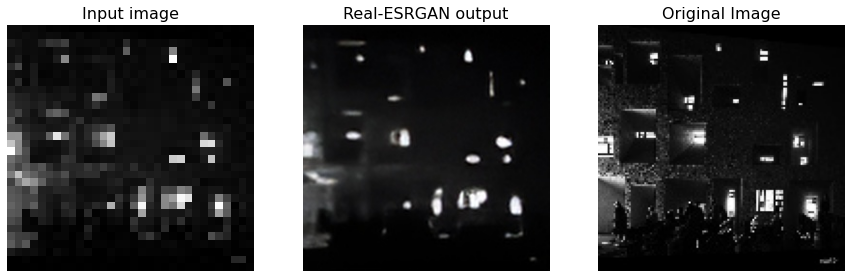

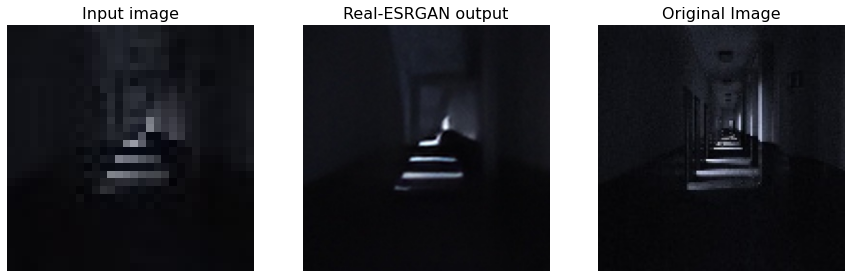

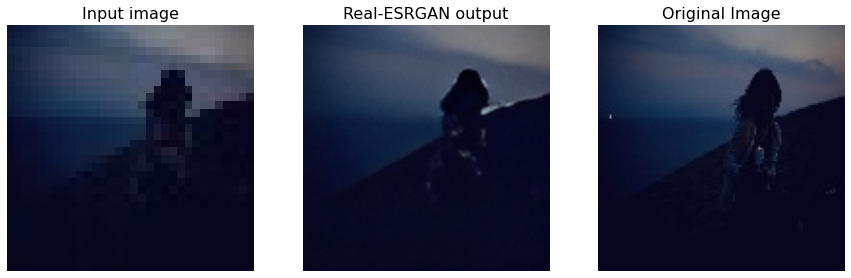

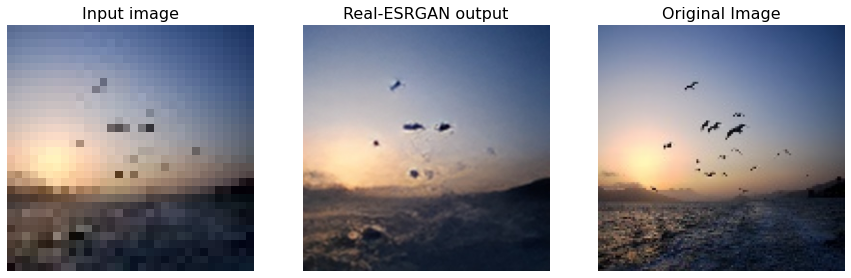

In [20]:
###  Image visualizations

# Display setup
def display(img1, img2, img3):
    
  fig = plt.figure(figsize=(15, 5))

  ax1 = fig.add_subplot(1, 3, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 3, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, 3, 3)
  plt.title('Original Image', fontsize=16)
  ax3.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
  ax3.imshow(img3)

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# Input and results folder
input_folder = '/TestImages/lr_images'
original_folder = '/TestImages/hr_images'
result_folder = '/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
original_list = sorted(glob.glob(os.path.join(original_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
# Small subset of input for demo
demo_inp_list = input_list[0:5]
demo_original_list = original_list[0:5]
demo_out_list = output_list[0:5]


# Print images
for input_path,original_path,output_path in zip(demo_inp_list,demo_original_list,demo_out_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  img_original = imread(original_path)
  display(img_input,img_output,img_original)